# COURSE: A deep understanding of deep learning
## SECTION: Autoencoders
### LECTURE: Denoising MNIST
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [93]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import and process the data

In [94]:
# # import dataset (comes with colab!)
# data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

# # don't need labels!
# data = data[:,1:]

# # normalize the data to a range of [0 1]
# dataNorm = data / np.max(data)

# # convert to tensor
# dataT = torch.tensor( dataNorm ).float()

import torchvision.datasets as datasets
mnist_train = datasets.MNIST(root='./data', train=True, download=True)
mnist_test = datasets.MNIST(root='./data', train=False, download=True)

train_data = mnist_train.data
train_labels = mnist_train.targets
test_data = mnist_test.data
test_labels = mnist_test.targets

# reshape data to 2D tensor
train_data = train_data.reshape(-1, 28*28).float()
test_data = test_data.reshape(-1, 28*28).float()

labels = torch.cat((train_labels, test_labels), dim=0)
data = torch.cat((train_data, test_data), dim=0)

# extract labels (number IDs) and remove from data
# labels = data[:,0]
# data   = data[:,1:]

dataNorm = data / np.max(data.numpy())

labelsPy = labels.numpy()
dataPy = data.numpy()

print(dataNorm.shape)
print(labels.shape)

dataT = torch.tensor(dataNorm)

torch.Size([70000, 784])
torch.Size([70000])


/tmp/ipykernel_2134/4270108361.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataT = torch.tensor(dataNorm)


# Create the DL model

In [95]:
# create a class for the model
def createTheMNISTAE():

  class aenet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,250)
      
      ### encoder layer
      # self.enc = nn.Linear(250,100)
      self.enc = nn.Linear(250,50)
      # self.enc = nn.Linear(250,10)

      ### latent layer
      # self.lat = nn.Linear(10,250)
      self.lat = nn.Linear(50,250)
      # self.lat = nn.Linear(100,250)

      ### decoder layer
      self.dec = nn.Linear(250,784)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.enc(x) )
      x = F.relu( self.lat(x) )
      y = torch.sigmoid( self.dec(x) )
      return y
  
  # create the model instance
  net = aenet()
  
  # loss function
  lossfun = nn.MSELoss()
  # lossfun = nn.BCELoss()

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [96]:
# test the model with a bit of data
net,lossfun,optimizer = createTheMNISTAE()

X = dataT[:5,:]
yHat = net(X)

print(X.shape)
print(yHat.shape)

torch.Size([5, 784])
torch.Size([5, 784])


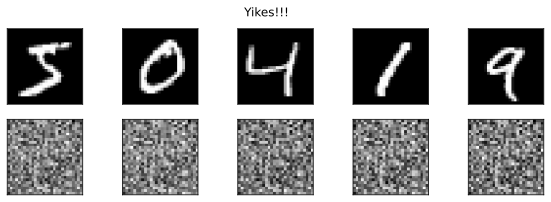

In [97]:
# let's see what the model did!
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  
plt.suptitle('Yikes!!!')
plt.show()

# Create a function that trains the model

In [98]:
from torch.utils.data import DataLoader, TensorDataset

def function2trainTheModel(dataT):

  # number of epochs
  # numepochs = 1
  numepochs = 10000
  
  # create a new model
  net,lossfun,optimizer = createTheMNISTAE()

  # create DataLoader
  # dataset = TensorDataset(dataT)
  # dataloader = DataLoader(dataset, batch_size=32, shuffle=True, drop_last=True)

  # initialize losses
  losses = torch.zeros(numepochs)
  # losses = torch.zeros(dataloader.__len__())

  # loop over epochs
  # for epochi in range(numepochs):
  #   for i,X_batch in enumerate(dataloader):
  #     X = X_batch[0]

  #     # forward pass and loss
  #     yHat = net(X)
  #     loss = lossfun(yHat,X)

  #     # backprop
  #     optimizer.zero_grad()
  #     loss.backward()
  #     optimizer.step()

  #     # losses in this epoch
  #     losses[i] = loss.item()
  # # end epochs  
   
  # loop over epochs
  for epochi in range(numepochs):
    
    # select a random set of images
    randomidx = np.random.choice(dataT.shape[0],size=32)
    X = dataT[randomidx,:]

    # forward pass and loss
    yHat = net(X)
    loss = lossfun(yHat,X)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # losses in this epoch
    losses[epochi] = loss.item()
  # end epochs

  # function output
  return losses,net,dataT

# Run the model and show the results!

Final loss: 0.0041


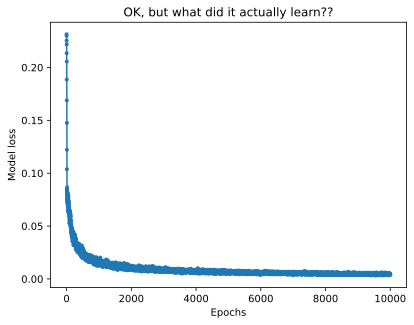

In [99]:
# train the model (90s)
losses,net,dataT = function2trainTheModel(dataT)
print(f'Final loss: {losses[-1]:.4f}')

# visualize the losses
plt.plot(losses,'.-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('OK, but what did it actually learn??')
plt.show()

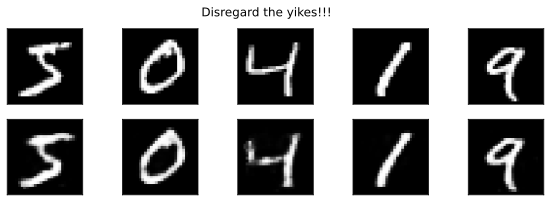

In [100]:
# Repeat the visualization when testing the model
X = dataT[:5,:]
yHat = net(X)


# let's see what the model did!
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  
plt.suptitle('Disregard the yikes!!!')
plt.show()

# Add noise to see a use case of an autoencoder

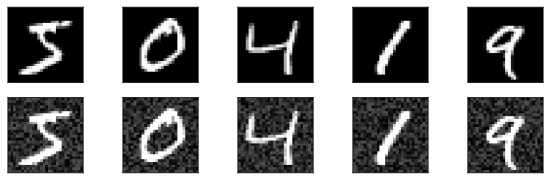

In [104]:
# grab a small set of images
X = dataT[:15,:]

# add noise
Xnoise = X + torch.rand_like(X)/3

# clip at 1
Xnoise[Xnoise>1] = 1


# show the noisy images
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  
plt.show()

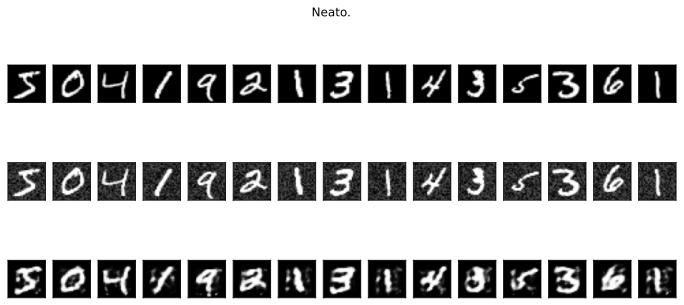

In [105]:
# run through the model
Y = net(Xnoise)


# show the noisy images
fig,axs = plt.subplots(3,15,figsize=(12,5))

for i in range(15):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[2,i].imshow(Y[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  axs[2,i].set_xticks([]), axs[2,i].set_yticks([])
  
plt.suptitle('Neato.')
plt.show()

# Additional explorations

In [103]:
# 1) Because these are continuous data, mean-squared-error is the correct loss function. But I mentioned in the previous 
#    video that binary cross-entropy loss is *sometimes* used in autoencoders. Does the loss function make a difference
#    for this problem? Why?
#
#    The loss function does make a difference, and the results are slightly worse (but appreciable!). This is due to the 
#    fact that the BCE loss function is designed for binary data, and in this case the data is continuous. 
# 
# 2) Change the number of units in the latent layer to 10. How does that affect the loss and denoising? Don't turn this 
#    into a full parametric experiment -- that's for the next video!
#
#    The issue here is that the model is not able to capture the complexity of the data with only 10 units in the latent
#    layer. The loss is higher (not as high that changing from MSE to BCE), but now the numbers are not correctly denoised
#    and the numbers are different from the original ones.
# 
# 3) The code here picks samples randomly, which means many samples are skipped, and some could be repeated. Change the 
#    code so that the model goes through every item exactly once per epoch. The order should be randomized to avoid 
#    possible order effects. You'll probably want to reduce the number of epochs!
#
#    The training is faster (because we have less data), but the results are worse. I don't know if we are overfitting the
#    model by training it with the same data over and over again, but in this case and with the knowledge I have, the
#    results are worse.
# 
# 4) Is it necessary to normalize the data to a range of [0 1]? What are arguments for normalization, and arguments why
#    it may not be critical (in this problem)?
#
#    It's not. Normally we normalize the data to remove the scale of the data, because if one feature has a bigger range
#    than the others, it will dominate the loss function. In this case, the data is always in the same range, so it's not
#    possible that this happens. The values will always be between 0 and 256, passing it to a range of 0-1 will not make
#    a difference.
# 
# 5) The autoencoder did a pretty decent job at denoising the images. How far can you push this? Try adding more noise
#    to the images and re-running the test code (you don't need to retrain the model). Is the autoencoder robust to a
#    a larger amount of noise?
#
#    Once you go more than 50% of noise, it starts to fail. The model is not able to denoise the images correctly, and
#    the results are worse than the previous ones. It makes sense, but it could be better. But if we increase the latent
#    layer, it becomes a little bit better.
# 